Yards Predictor

Use the widget below to predict how many yards the next play will gain!

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output


#Sets which columns to full from the data source
columns_to_use = [7, 8, 9, 19, 22, 23]
data = pd.read_csv('data.csv', usecols=columns_to_use)

my_linear = linear_model.LinearRegression()

x = data.iloc[:, [0, 1, 2, 4, 5]].values
y = data.iloc[:, 3].values

#Scales the values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

my_linear.fit(x_scaled, y)

linear_prediction = my_linear.predict(x_scaled)
mse = mean_squared_error(y, linear_prediction)
r2 = r2_score(y, linear_prediction)

#Sets input fields
input1 = widgets.FloatText(description='Down:')
input2 = widgets.FloatText(description='Yards To Go:')
input3 = widgets.FloatText(description='Current Yard Line:')
input4 = widgets.FloatText(description='1 for Run')
input5 = widgets.FloatText(description='1 for Pass:')
run_button = widgets.Button(description='Predict')


output = widgets.Output()


display(input1, input2, input3, input4, input5, run_button, output)

#Function which runs on click
def run_prediction(b):
    with output:
        clear_output(wait=True)  
        my_linear.fit(x_scaled, y)
        user_input = [[input1.value, input2.value, input3.value, input4.value, input5.value]]
        x_input_scaled = scaler.transform(user_input)
        pred_y = my_linear.predict(x_input_scaled)
        print(f'Predicted yards: {pred_y[0]}')


run_button.on_click(run_prediction)

FloatText(value=0.0, description='Down:')

FloatText(value=0.0, description='Yards To Go:')

FloatText(value=0.0, description='Current Yard Line:')

FloatText(value=0.0, description='1 for Run')

FloatText(value=0.0, description='1 for Pass:')

Button(description='Predict', style=ButtonStyle())

Output()

MSE = 
49.105579133106104
R2 = 
0.18782483503098912


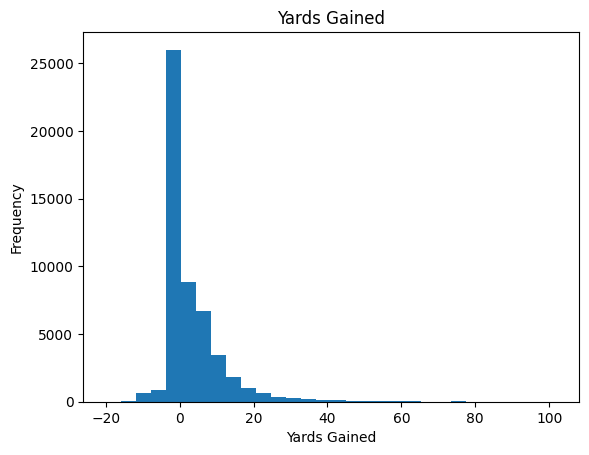

NameError: name 'mse' is not defined

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

columns_to_use = [7, 8, 9, 19, 22, 23]
data = pd.read_csv('data.csv', usecols=columns_to_use)

my_linear = linear_model.LinearRegression()

x = data.iloc[:, [0, 1, 2, 4, 5]].values
y = data.iloc[:, 3].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


data['Yards'].plot(kind='hist', bins=30, title='Yards Gained')

plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.show()

This is a chart showing the frequency of different yardage amounts gained on every play throughout the 2023 NFL season. An interesting insight here is just how rare big plays are. This displayed once more in the table below

In [10]:
import pandas as pd

data = pd.read_csv('data.csv', usecols=[19])

yard_gained = data['Yards'].values
mean_yards = data['Yards'].mean()
median_yards = data['Yards'].median()
mode_yards = data['Yards'].mode()

mode_yards = mode_yards[0]

summary_table = pd.DataFrame({'Statistic': ["Mean", "Median", "Mode"],
                              'Yards Gained': [mean_yards, median_yards, mode_yards]
})

print(summary_table)

  Statistic  Yards Gained
0      Mean      3.751847
1    Median      0.000000
2      Mode      0.000000


This table shows that both the mode and median of yards gained on a play is actually zero. This is an interesting insight and worth considering when debating whether the yards gained on a play can be considered succesful.

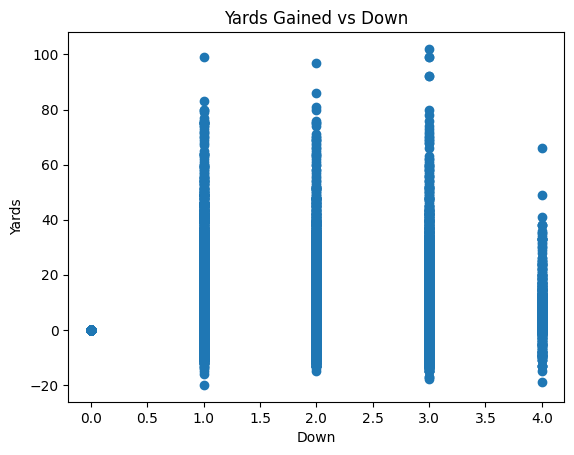

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', usecols=[7, 19])

data.columns = ['Down', 'Yards']

plt.scatter(data.Down, data.Yards)
plt.title('Yards Gained vs Down')
plt.xlabel('Down')
plt.ylabel('Yards')
plt.show()

The above scatter plot provides another interesting insight. Primarily that outside of 4th down the distribution of yards gained is relatively even across every down. Given that fourth downs can involve punts or field goals it makes sense that it would be the lowest in terms of yards gained.

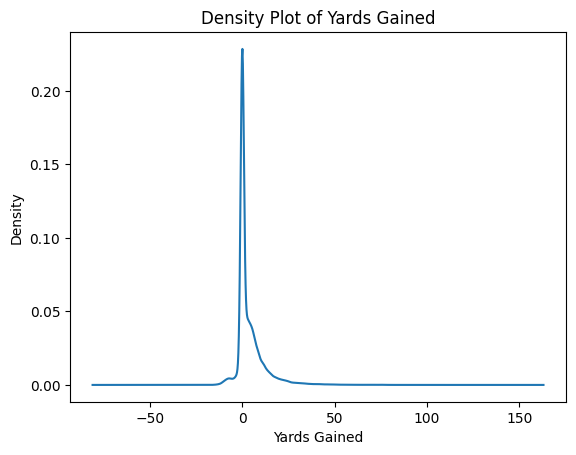

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')


data['Yards'].plot(kind='density', title='Density Plot of Yards Gained')
plt.xlabel('Yards Gained')
plt.show()

This graph just further drives home the key takeaway from this project which is just how rare big plays are, and that the vast majoirty of plays will gain shockingly little yardage.